In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
import joblib

# Load Dataset

In [ ]:
# loading excel file and defining years
excel_file = "/content/drive/MyDrive/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx"
years = range(2010,2017)

In [ ]:
# Reading the first sheet of the Excel file
df_1 = pd.read_excel(excel_file , sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [ ]:
df_2 = pd.read_excel(excel_file , sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [ ]:
all_data = []

for year in years:
    try :
        df_com = pd.read_excel(excel_file , sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file , sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com. rename(columns={
            'Commodity Code':'Code',
            'Commodity Name':'Name'
        },inplace=True)

        df_ind.rename(columns={
        'Industry Code':'Code',
        'Industry Name':'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")



In [ ]:
all_data[2]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.438,0.068,0.506,NaN,4,3,1,4,1,Commodity,2012
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2012
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2012
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2012
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.693,0.076,0.769,NaN,4,3,1,4,1,Commodity,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.007,0.000,0.007,NaN,4,3,1,5,1,Industry,2012
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2012
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2012
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2012


In [ ]:
len(all_data)

7

In [ ]:
df = pd.concat(all_data, ignore_index=True)
df.head(5)

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [ ]:
len(df)

22092

# Data Preprocessing

In [ ]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


In [ ]:
df.drop(columns='Unnamed: 7', inplace=True)

In [ ]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [ ]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0
DQ GeographicalCorrelation of Factors without Margins,0


In [ ]:
print("Data Summary:")
print(df.describe().T)

Data Summary:
                                                      count         mean  \
Supply Chain Emission Factors without Margins       22092.0     0.084807   
Margins of Supply Chain Emission Factors            22092.0     0.012857   
Supply Chain Emission Factors with Margins          22092.0     0.097681   
DQ ReliabilityScore of Factors without Margins      22092.0     3.308030   
DQ TemporalCorrelation of Factors without Margins   22092.0     2.571429   
DQ GeographicalCorrelation of Factors without M...  22092.0     1.000000   
DQ TechnologicalCorrelation of Factors without ...  22092.0     2.632129   
DQ DataCollection of Factors without Margins        22092.0     1.000000   
Year                                                22092.0  2013.000000   

                                                         std     min     25%  \
Supply Chain Emission Factors without Margins       0.267039     0.0     0.0   
Margins of Supply Chain Emission Factors            0.078720     

# Data Visualization

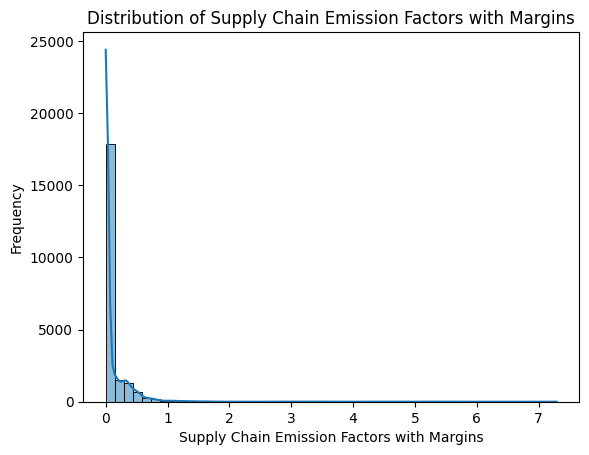

In [ ]:
sns.histplot(df['Supply Chain Emission Factors with Margins'],bins=50 , kde=True)
plt.xlabel("Supply Chain Emission Factors with Margins")
plt.ylabel("Frequency")
plt.title("Distribution of Supply Chain Emission Factors with Margins")
plt.show()

In [ ]:
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [ ]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [ ]:
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [ ]:
df['Substance'] = df['Substance'].astype(str).str.strip().str.lower()
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other ghgs'],
      dtype=object)

In [ ]:
# Mapping substances to numerical values for model training
substance_mapping = {
    'carbon dioxide': 0,
    'methane': 1,
    'nitrous oxide': 2,
    'other ghgs': 3
}
df['Substance'] = df['Substance'].map(substance_mapping)

In [ ]:
df['Substance'].unique()

array([0, 1, 2, 3])

In [ ]:
# Mapping units to numerical values for model training
df['Unit'] = df['Unit'].astype(str).str.strip().str.lower()
df['Unit'].unique()

array(['kg/2018 usd, purchaser price',
       'kg co2e/2018 usd, purchaser price'], dtype=object)

In [ ]:
# Define a mapping for the 'Unit' column
unit_mapping = {
    'kg/2018 usd, purchaser price': 0,
    'kg co2e/2018 usd, purchaser price': 1
}
df['Unit'] = df['Unit'].map(unit_mapping)

In [ ]:
# Check unique values in 'Unit' column
print(df['Unit'].unique())

[0 1]


In [ ]:
df['Source'] = df['Source'].astype(str).str.strip().str.lower()
df['Source'].unique()


array(['commodity', 'industry'], dtype=object)

In [ ]:
# Mapping 'Source' to numerical values for model training
source_mapping = {
    'industry': 0,
    'commodity': 1
}

df['Source'] = df['Source'].map(source_mapping)

In [ ]:
df['Source'].unique()

array([1, 0])

In [ ]:
df.Code.unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [ ]:
df.Name.unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [ ]:
len(df.Name.unique())

713

In [ ]:
# Top 10 commodities/industries by supply chain emission factors
top_10 = df[['Name','Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(by='Supply Chain Emission Factors with Margins', ascending=False).head(10)

# Resetting the index of the top_10 DataFrame , after grouping 'Name' is index
top_10 = top_10.reset_index()
top_10

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,1.686179
1,Cement,1.324964
2,"Electric power generation, transmission, and d...",1.220357
3,Electricity,1.016143
4,"Dolls, toys, and games",0.832179
5,Lime and gypsum products,0.816536
6,Lime and gypsum product manufacturing,0.799679
7,Industrial gas manufacturing,0.612929
8,Compressed Gases,0.539679
9,Clothing,0.468714


/tmp/ipython-input-36-3132192880.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', title='Legend')


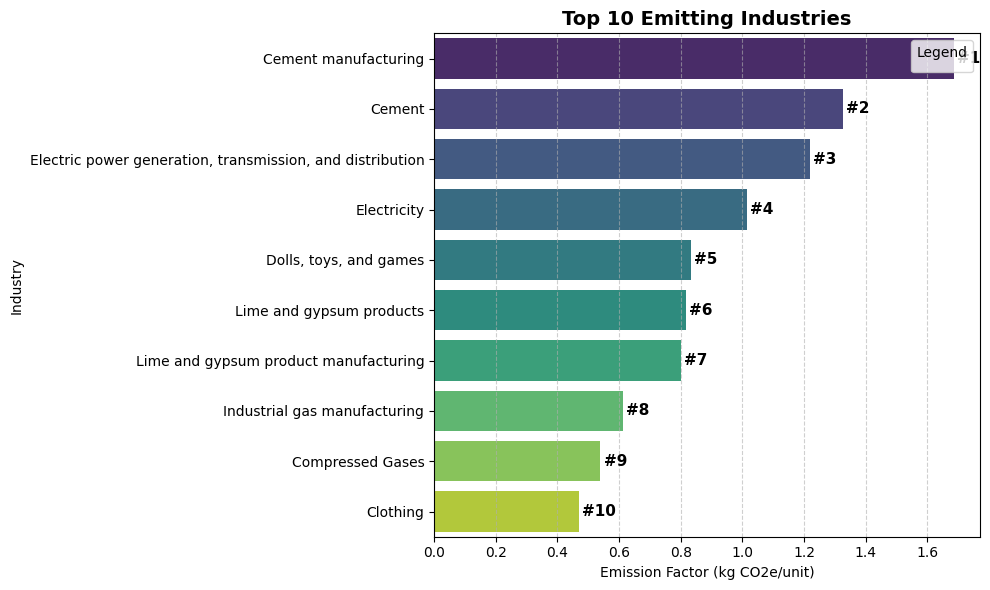

In [ ]:
# Plotting the top 10 commodities/industries by supply chain emission factors

plt.figure(figsize=(10,6))
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_10,
    hue='Name',
    palette='viridis'
)

# Add ranking labels (1, 2, 3..) next to bars
for i, (value, name) in enumerate(zip(top_10['Supply Chain Emission Factors with Margins'], top_10.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot
plt.xlabel('Emission Factor (kg CO2e/unit)')
plt.ylabel('Industry')
plt.legend(loc='upper right', title='Legend')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [ ]:
# Dropping unnecessary columns for model training
df.drop(columns=['Name','Code','Year'], inplace=True)

In [ ]:
print("First 5 rows of the cleaned DataFrame:")
df.head()


First 5 rows of the cleaned DataFrame:


,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.398,0.073,0.470,4,3,1,4,1,1
1,1,0,0.001,0.001,0.002,4,3,1,1,1,1
2,2,0,0.002,0.000,0.002,4,3,1,4,1,1
3,3,1,0.002,0.000,0.002,3,3,1,3,1,1
4,0,0,0.659,0.081,0.740,4,3,1,4,1,1


In [ ]:
print("Shape of the DataFrame :", df.shape)

Shape of the DataFrame : (22092, 11)


In [ ]:
print("Columns in the DataFrame:")
df.columns

Columns in the DataFrame:


Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

# Defining features and the target

In [ ]:
# Feature set and target variable for model training
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
Y = df['Supply Chain Emission Factors with Margins']

In [ ]:
X.head()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.398,0.073,4,3,1,4,1,1
1,1,0,0.001,0.001,4,3,1,1,1,1
2,2,0,0.002,0.000,4,3,1,4,1,1
3,3,1,0.002,0.000,3,3,1,3,1,1
4,0,0,0.659,0.081,4,3,1,4,1,1


In [ ]:
Y.head()

,Supply Chain Emission Factors with Margins
0,0.470
1,0.002
2,0.002
3,0.002
4,0.740


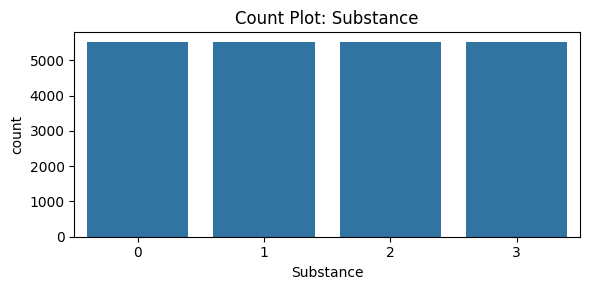

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.show()

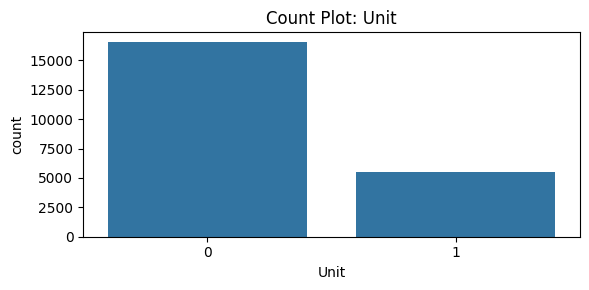

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks()
plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

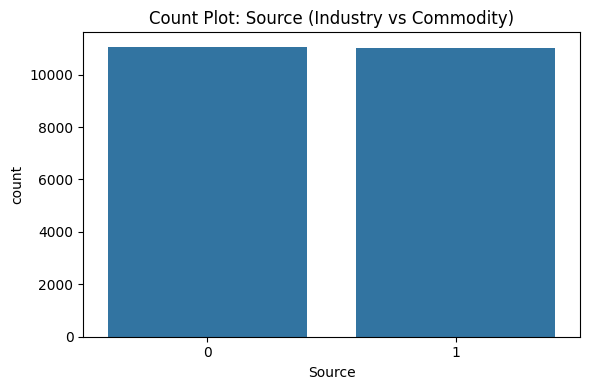

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.xticks()
plt.tight_layout()
plt

In [ ]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [ ]:
df.select_dtypes(include=np.number).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000e+00,7.745967e-01,-0.391851,-0.218400,-0.421603,0.095092,-3.667637e-15,NaN,0.198415,NaN,-4.275104e-16
Unit,7.745967e-01,1.000000e+00,-0.155859,-0.094300,-0.169741,-0.025159,-3.173071e-17,NaN,0.286990,NaN,1.439119e-17
Supply Chain Emission Factors without Margins,-3.918505e-01,-1.558594e-01,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,-2.713112e-02
Margins of Supply Chain Emission Factors,-2.184002e-01,-9.429989e-02,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,6.750426e-02
Supply Chain Emission Factors with Margins,-4.216032e-01,-1.697410e-01,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,-6.687828e-03
DQ ReliabilityScore of Factors without Margins,9.509190e-02,-2.515938e-02,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,1.228726e-02
DQ TemporalCorrelation of Factors without Margins,-3.667637e-15,-3.173071e-17,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-1.908036e-15
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,1.984154e-01,2.869901e-01,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,-2.827202e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

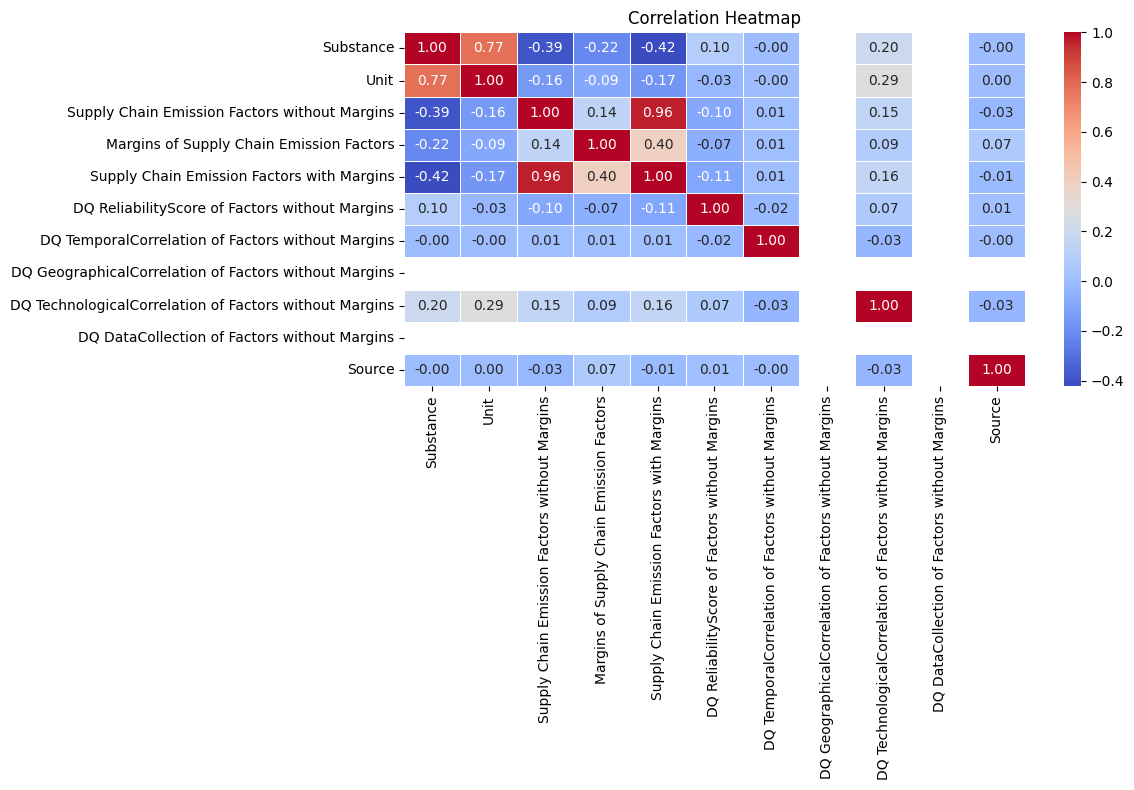

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()